# Comunicación efectiva

## 1. Utilizar la librería `ggplot` o su equivalente `plotnine` para presentar datos de mortalidad en Gran Canaria. Se deben elegir adecuadamente las escalas, presentar gráficos variados y que contrasten la situación en varias regiones de la isla. Bien por municipios o por comarcas, por ejemplo: Norte, Las Palmas, Sur, Centro, etc.

In [65]:
import pandas as pd
import geopandas as gp
from plotnine import *

df = pd.read_csv('../data/defStatTasas.csv').drop(labels = 'Unnamed: 0', axis = 'columns')

df['Municipio'] = df['Municipio'].str.strip()
df['Defunciones'] = pd.to_numeric(df['Defunciones'].str.replace(',', '.').str.replace('....', '0').str.replace('.', '0'))

display(df.groupby(['Municipio', 'Año']).agg({'Defunciones': 'sum'}))

Defunciones
Municipio         Año              
Agaete            2018      1853187
                  2019      2065901
                  2020      1692822
                  2021      2005679
Agüimes           2018      1042528
...                             ...
Valsequillo       2021      1393602
Vega de San Mateo 2018      1677935
                  2019      1885173
                  2020      1856844
                  2021      1962173

[84 rows x 1 columns]

## 2. Realizar una historia similar por islas

In [66]:
canary_islands = gp.read_file('../data/indicadores_poblacion_municipios.geojson').filter(
    items = [
        'indicadores_municipal_MUNICIPIO',
        'label',
        'indicadores_municipal_CUISLA',
        'geometry'
    ],
    axis = 'columns'
)

display(canary_islands)

,indicadores_municipal_MUNICIPIO,label,indicadores_municipal_CUISLA,geometry
0,Yaiza,Yaiza,ES708,"MULTIPOLYGON (((-13.69457 28.98678, -13.69850 ..."
1,T�as,Tías,ES708,"MULTIPOLYGON (((-13.70047 28.91793, -13.70089 ..."
2,Santa Cruz de Tenerife,Santa Cruz de Tenerife,ES709,"MULTIPOLYGON (((-16.27476 28.57259, -16.27444 ..."
3,Valverde,Valverde,ES703,"MULTIPOLYGON (((-17.96079 27.69245, -17.96750 ..."
4,Artenara,Artenara,ES705,"MULTIPOLYGON (((-15.74959 27.98801, -15.75005 ..."
...,...,...,...,...
83,San Sebasti�n de la Gomera,San Sebastián de La Gomera,ES706,"MULTIPOLYGON (((-17.19498 28.02910, -17.19870 ..."
84,Santa Cruz de la Palma,Santa Cruz de La Palma,ES707,"MULTIPOLYGON (((-17.75216 28.70539, -17.75264 ..."
85,Puerto del Rosario,Puerto del Rosario,ES704,"MULTIPOLYGON (((-13.82862 28.56373, -13.82939 ..."
86,San Crist�bal de La Laguna,San Cristóbal de La Laguna,ES709,"MULTIPOLYGON (((-16.41127 28.52665, -16.41105 ..."


In [72]:
summarized_df = canary_islands.merge(df, how = 'left', left_on = 'indicadores_municipal_MUNICIPIO', right_on = 'Municipio').filter([
    'indicadores_municipal_MUNICIPIO',
    'label',
    'indicadores_municipal_CUISLA',
    'Año',
    'Defunciones',
    'geometry'
])

summarized_df['Defunciones'] = summarized_df['Defunciones'].fillna(0)

display(summarized_df)

,indicadores_municipal_MUNICIPIO,label,indicadores_municipal_CUISLA,Año,Defunciones,geometry
0,Yaiza,Yaiza,ES708,NaN,0.0,"MULTIPOLYGON (((-13.69457 28.98678, -13.69850 ..."
1,T�as,Tías,ES708,NaN,0.0,"MULTIPOLYGON (((-13.70047 28.91793, -13.70089 ..."
2,Santa Cruz de Tenerife,Santa Cruz de Tenerife,ES709,NaN,0.0,"MULTIPOLYGON (((-16.27476 28.57259, -16.27444 ..."
3,Valverde,Valverde,ES703,NaN,0.0,"MULTIPOLYGON (((-17.96079 27.69245, -17.96750 ..."
4,Artenara,Artenara,ES705,2021.0,0.0,"MULTIPOLYGON (((-15.74959 27.98801, -15.75005 ..."
...,...,...,...,...,...,...
1895,Arucas,Arucas,ES705,2018.0,5025.0,"MULTIPOLYGON (((-15.55942 28.14719, -15.55940 ..."
1896,Arucas,Arucas,ES705,2021.0,10034.0,"MULTIPOLYGON (((-15.55942 28.14719, -15.55940 ..."
1897,Arucas,Arucas,ES705,2020.0,20071.0,"MULTIPOLYGON (((-15.55942 28.14719, -15.55940 ..."
1898,Arucas,Arucas,ES705,2019.0,41067.0,"MULTIPOLYGON (((-15.55942 28.14719, -15.55940 ..."


In [39]:
# http://nuts.geovocab.org/id/nuts3.html
cuisla_dictionary = {
    'el_hierro':        'ES703',
    'fuerteventura':    'ES704',
    'gran_canaria' :    'ES705',
    'la_gomera':        'ES706',
    'la_palma':         'ES707',
    'lanzarote':        'ES708',
    'tenerife':         'ES709',
}

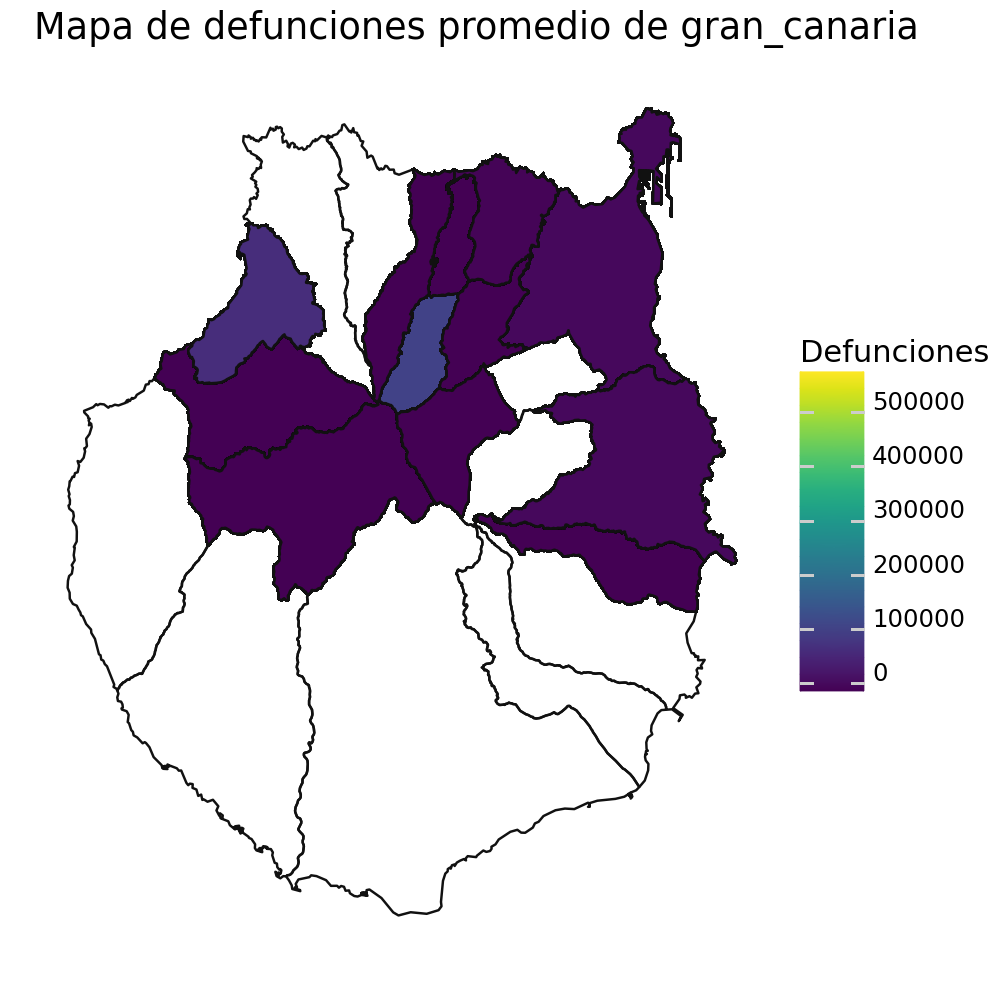

<Figure Size: (500 x 500)>

In [82]:
ISLAND = 'gran_canaria'

(ggplot()
    + geom_map(summarized_df.query(f'indicadores_municipal_CUISLA=="{cuisla_dictionary[ISLAND]}"'), fill = None)
    + geom_map(summarized_df.query(f'indicadores_municipal_CUISLA=="{cuisla_dictionary[ISLAND]}" & Año==2018'), aes(fill='Defunciones'))
    + labs(title = f'Mapa de defunciones promedio de {ISLAND}')
    + theme(
        figure_size = (5, 5),
        panel_background = element_rect(fill = 'white'),
        axis_text_x = element_blank(),
        axis_text_y = element_blank(),
        axis_ticks_major_x = element_blank(),
        axis_ticks_major_y = element_blank()
    )
)